In [41]:
import pandas as pd
import os
import statistics
from matplotlib import pyplot as plt
import seaborn as sns
from ReadersourcingToolkit import ReadersourcingToolkit
import numpy as np
import math
from scipy.stats.stats import pearsonr
from scipy.stats.stats import kendalltau

In [2]:
# ------------------------------
# ---------- EXP 1-A -----------
# ------------------------------

# Analizzo l'andamento degli score di tre reader "speciali" per X shuffle dei rating di un dato seed.
# Reader 1 vota sempre nel modo "esatto" (sulla media). 
# Reader 2 vota sempre a metà scala rispetto a 1001.
# Reader 3 vota sempre sugli estremi.
# L'ordinamento desiderato degli score è Reader 1 -> Reader 2 -> Reader 3 (ordine crescente)

seed = ReadersourcingToolkit(
    dataset_name="seed_shuffle_1_special", 
    dataset_folder_path="../data/{}/", 
    data_shuffled=True, 
    current_shuffle = 0,
    shuffle_amount=100
)

# Plot parameters

plt.rcParams['figure.figsize']=(6,6)
linesize = .5

# Paths

result_folder_experiments_path = "{}/experiments/".format(seed.result_folder_base_path)
result_folder_exp_1_a_path = "{}/experiment_1-a/".format(result_folder_experiments_path)
os.makedirs(result_folder_experiments_path, exist_ok=True)
os.makedirs(result_folder_exp_1_a_path, exist_ok=True)

In [17]:
shuffle_perc = 5
papers_perc = 5
df = seed.build_quantity_df_shuffle("Reader Score", shuffle_perc, 0)

readers_number = df[df["Shuffle"] == 0].shape[0]

df = df[
    (df["Identifier"] == readers_number-1) |
    (df["Identifier"] == readers_number-2) |
    (df["Identifier"] == readers_number-3) 
]

0/100 (0/100%)


ValueError: Expected object or value

In [73]:
with plt.rc_context({'lines.linewidth': linesize}):
    ax = sns.pointplot(x="Identifier", y="Quantity", hue="Shuffle", 
                       data=df, order=[readers_number-3,readers_number-2,readers_number-1])
    ax.set_title(f"shuffle_perc: {shuffle_perc}%")
fig = ax.get_figure()
path = "{}/special-reader-score-lineplot.pdf".format(result_folder_exp_1_a_path)
fig.savefig(path, bbox_inches='tight')
plt.close(fig)

In [55]:
# ------------------------------
# ---------- EXP 1-B -----------
# ------------------------------

# Analizzo le quantità calcolate da Readersourcing per X shuffle dei rating di un dato seed.
# Per ciascuna quantità viene costruito un grafico che mostra i valori della quantità corrente per ciascuno shuffle.

seed_shuffle_1 = ReadersourcingToolkit(
    dataset_name="seed_shuffle_1", 
    dataset_folder_path="../data/{}/", 
    data_shuffled=True, 
    current_shuffle = 0,
    shuffle_amount=100
)

# Plot parameters

linesize = .75

# Paths

result_folder_experiments_path = "{}/experiments/".format(seed_shuffle_1.result_folder_base_path)
result_folder_exp_1_b_path = "{}/experiment_1-b/".format(result_folder_experiments_path)
os.makedirs(result_folder_experiments_path, exist_ok=True)
os.makedirs(result_folder_exp_1_b_path, exist_ok=True)

In [56]:
shuffle_perc = 5
papers_perc = 5
df = seed.build_quantity_df_shuffle("Paper Score", seed_shuffle_1, shuffle_perc, papers_perc)

print("---------- BUILDING PAPER SCORE LINE PLOT ----------")
with plt.rc_context({'lines.linewidth': linesize}):
    ax = sns.pointplot(x="Identifier", y="Quantity", hue="Shuffle", data=df)
    ax.set_title(f"shuffle_perc: {shuffle_perc}%, papers_perc: {papers_perc}%")
fig = ax.get_figure()
path = "{}/paper-score-lineplot.pdf".format(result_folder_exp_1_b_path)
fig.savefig(path, bbox_inches='tight')
plt.close(fig)

0/100 (0/100%)
100/100 (100/100%)
---------- BUILDING PAPER SCORE LINE PLOT ----------


In [57]:
shuffle_perc = 5
papers_perc = 5
df = seed.build_quantity_df_shuffle("Paper Steadiness", seed_shuffle_1, shuffle_perc, papers_perc)

print("---------- BUILDING PAPER STEADINESS LINE PLOT ----------")
with plt.rc_context({'lines.linewidth': linesize}):
    ax = sns.pointplot(x="Identifier", y="Quantity", hue="Shuffle", data=df)
    ax.set_title(f"shuffle_perc: {shuffle_perc}%, papers_perc: {papers_perc}%")
fig = ax.get_figure()
path = "{}/paper-steadiness-lineplot.pdf".format(result_folder_exp_1_b_path)
fig.savefig(path, bbox_inches='tight')
plt.close(fig)

0/100 (0/100%)
100/100 (100/100%)
---------- BUILDING PAPER STEADINESS LINE PLOT ----------


In [58]:
shuffle_perc = 5
readers_perc = 2
df = seed.build_quantity_df_shuffle("Reader Score", seed_shuffle_1, shuffle_perc, readers_perc)

print("---------- BUILDING READER SCORE LINE PLOT ----------")
with plt.rc_context({'lines.linewidth': linesize}):
    ax = sns.pointplot(x="Identifier", y="Quantity", hue="Shuffle", data=df)
    ax.set_title(f"shuffle_perc: {shuffle_perc}%, readers_perc: {readers_perc}%")
fig = ax.get_figure()
path = "{}/reader-score-lineplot.pdf".format(result_folder_exp_1_b_path)
fig.savefig(path, bbox_inches='tight')
plt.close(fig)

0/100 (0/100%)
100/100 (100/100%)
---------- BUILDING READER SCORE LINE PLOT ----------


In [60]:
shuffle_perc = 5
readers_perc = 2
df = seed.build_quantity_df_shuffle("Reader Steadiness", seed_shuffle_1, shuffle_perc, readers_perc)

print("---------- BUILDING READER STEADINESS LINE PLOT ----------")
with plt.rc_context({'lines.linewidth': linesize}):
    ax = sns.pointplot(x="Identifier", y="Quantity", hue="Shuffle", data=df)
    ax.set_title(f"shuffle_perc: {shuffle_perc}%, readers_perc: {readers_perc}%")
fig = ax.get_figure()
path = "{}/reader-steadiness-lineplot.pdf".format(result_folder_exp_1_b_path)
fig.savefig(path, bbox_inches='tight')
plt.close(fig)

0/100 (0/100%)
100/100 (100/100%)
---------- BUILDING READER STEADINESS LINE PLOT ----------


In [35]:
# ------------------------------
# ---------- EXP 1-C -----------
# ------------------------------

# Le quantità calcolate da Readersourcing vengono comparate con la loro media aritmetica, geometrica, bayesiana e con la mediana.
# Gli indici standard vengono calcolati sui giudizi ricevuti da ciascun Paper e sui giudizi assegnati da ciascun Reader.

seed = ReadersourcingToolkit(
    dataset_name="seed_1/p_1_beta/", 
    dataset_folder_path="../data/{}/", 
)

# Plot parameters

linesize = .75
    
# Paths

result_folder_experiments_path = "{}/experiments/".format(seed.result_folder_base_path)
result_folder_exp_1_c_path = "{}/experiment_1-c/".format(result_folder_experiments_path)
os.makedirs(result_folder_experiments_path, exist_ok=True)
os.makedirs(result_folder_exp_1_c_path, exist_ok=True)

# Functions

def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

def compute_means(raw_df, quantity_df, quantity_label, axis):
        
    mean_df = pd.DataFrame(columns=[quantity_label])
    mean_df[quantity_label] = quantity_df["Quantity"]
    mean_df["Arithmetic Mean"] = raw_df.mean(axis=axis)
    mean_df["Geometric Mean"] = raw_df.apply(geo_mean, axis=axis)
    mean_df["Median"] = raw_df.mean(axis=axis)
    cols = []
    for col in raw_df.columns.values:
        cols.append(col)
    raw_df["v"] = raw_df[cols].count(axis=1)    
    m = np.mean(raw_df['v'])
    raw_df['w'] = raw_df['v']/(raw_df['v'] + m)
    raw_df['r'] = np.mean(raw_df[cols], axis=1)
    c = np.mean(raw_df[cols].values.flatten())
    raw_df['b'] = raw_df['w']*raw_df['r'] + (1 - raw_df['w'])*c
    raw_df = raw_df.drop(['v', 'w', 'r'], axis=1)
    mean_df["Bayesian Mean"] = raw_df["b"]
    mean_df = mean_df.fillna(0)
        
    corr_df = pd.DataFrame(columns=[
        "Rho (Arithmetic Mean)",
        "Rho (Geometric Mean)",
        "Rho (Bayesian Mean)",
        "Rho (Median)",
        "Tau (Arithmetic Mean)",
        "Tau (Geometric Mean)",
        "Tau (Bayesian Mean)",
        "Tau (Median)",
    ])
    
    dict = {}
    quantity_column = mean_df[quantity_label]
    columns = mean_df.drop(quantity_label, axis=1).columns
    for col in columns:
        mean_column = mean_df[col]
        pearson_corr_val = pearsonr(quantity_column, mean_column)[0]
        if math.isnan(pearson_corr_val):
            pearson_corr_val = 0
        kendall_corr_val = kendalltau(quantity_column, mean_column)[0]
        if math.isnan(kendall_corr_val):
            kendall_corr_val = 0
        dict[f'Rho ({col})'] = pearson_corr_val
        dict[f'Tau ({col})'] = kendall_corr_val
    corr_df = corr_df.append(dict, ignore_index=True)
    
    return corr_df, mean_df
    
ratings_df = seed.extract_ratings_df()

print("---------- BUILDING PAPER SCORE DATAFRAME ----------")
paper_score_df = seed.build_quantity_df("Paper Score", 100)
print("---------- BUILDING PAPER STEADINESS DATAFRAME ----------")
paper_steadiness_df = seed.build_quantity_df("Paper Steadiness", 100)
print("---------- BUILDING READER SCORE DATAFRAME ----------")
reader_score_df = seed.build_quantity_df("Reader Score", 100)
print("---------- BUILDING READER STEADINESS DATAFRAME ----------")
reader_steadiness_df = seed.build_quantity_df("Reader Steadiness", 100)

---------- BUILDING PAPER SCORE DATAFRAME ----------
500/5000 (10/100%)
1000/5000 (20/100%)
1500/5000 (30/100%)
2000/5000 (40/100%)
2500/5000 (50/100%)
3000/5000 (60/100%)
3500/5000 (70/100%)
4000/5000 (80/100%)
4500/5000 (90/100%)
5000/5000 (100/100%)
5000/5000 (100/100%)
---------- BUILDING PAPER STEADINESS DATAFRAME ----------
500/5000 (10/100%)
1000/5000 (20/100%)
1500/5000 (30/100%)
2000/5000 (40/100%)
2500/5000 (50/100%)
3000/5000 (60/100%)
3500/5000 (70/100%)
4000/5000 (80/100%)
4500/5000 (90/100%)
5000/5000 (100/100%)
5000/5000 (100/100%)
---------- BUILDING READER SCORE DATAFRAME ----------
250/2500 (10/100%)
500/2500 (20/100%)
750/2500 (30/100%)
1000/2500 (40/100%)
1250/2500 (50/100%)
1500/2500 (60/100%)
1750/2500 (70/100%)
2000/2500 (80/100%)
2250/2500 (90/100%)
2500/2500 (100/100%)
2500/2500 (100/100%)
---------- BUILDING READER STEADINESS DATAFRAME ----------
250/2500 (10/100%)
500/2500 (20/100%)
750/2500 (30/100%)
1000/2500 (40/100%)
1250/2500 (50/100%)
1500/2500 (60/100%

In [36]:
# CSV Files Computation

os.makedirs("{}/csv/".format(result_folder_exp_1_c_path), exist_ok=True)

print("---------- BUILDING PAPER SCORE CORRELATION DATAFRAME ----------")
corr_df_1, mean_df_1 = compute_means(ratings_df, paper_score_df, "Paper Score", 0)
output_path = "{}csv/Corr_Df_Paper_Score.csv".format(result_folder_exp_1_c_path)
corr_df_1.to_csv(output_path, index=False)
print("Saved at path: ", output_path)

print("---------- BUILDING PAPER STEADINESS CORRELATION DATAFRAME ----------")
corr_df_2, mean_df_2 = compute_means(ratings_df, paper_steadiness_df, "Paper Steadiness", 0)
output_path = "{}csv/Corr_Df_Paper_Steadiness.csv".format(result_folder_exp_1_c_path)
corr_df_2.to_csv(output_path, index=False)
print("Saved at path: ", output_path)

print("---------- BUILDING READER SCORE CORRELATION DATAFRAME ----------")
corr_df_3, mean_df_3 = compute_means(ratings_df, reader_score_df, "Reader Score", 1)
output_path = "{}csv/Corr_Df_Reader_Score.csv".format(result_folder_exp_1_c_path)
corr_df_3.to_csv(output_path, index=False)
print("Saved at path: ", output_path)

print("---------- BUILDING READER SCORE CORRELATION DATAFRAME ----------")
corr_df_4, mean_df_4 = compute_means(ratings_df, reader_steadiness_df, "Reader Steadiness", 1)
output_path = "{}csv/Corr_Df_Reader_Steadiness.csv".format(result_folder_exp_1_c_path)
corr_df_4.to_csv(output_path, index=False)
print("Saved at path: ", output_path)

---------- BUILDING PAPER SCORE CORRELATION DATAFRAME ----------
Saved at path:  ../models/seed_1/p_1_beta//readersourcing//experiments//experiment_1-c/csv/Corr_Df_Paper_Score.csv
---------- BUILDING PAPER STEADINESS CORRELATION DATAFRAME ----------
Saved at path:  ../models/seed_1/p_1_beta//readersourcing//experiments//experiment_1-c/csv/Corr_Df_Paper_Steadiness.csv
---------- BUILDING READER SCORE CORRELATION DATAFRAME ----------
Saved at path:  ../models/seed_1/p_1_beta//readersourcing//experiments//experiment_1-c/csv/Corr_Df_Reader_Score.csv
---------- BUILDING READER SCORE CORRELATION DATAFRAME ----------
Saved at path:  ../models/seed_1/p_1_beta//readersourcing//experiments//experiment_1-c/csv/Corr_Df_Reader_Steadiness.csv


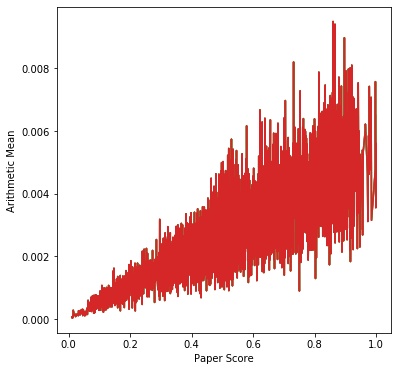

In [43]:
os.makedirs("{}/plots/".format(result_folder_exp_1_c_path), exist_ok=True)

ax = sns.lineplot(x=mean_df_1["Paper Score"], y=mean_df_1["Arithmetic Mean"])
plt.show()

 # regplot paper score asse x media asse y
 
 
 